In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('fake_job_postings.csv')

In [3]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [4]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [5]:
df.nunique().sum

<bound method Series.sum of job_id                 17880
title                  11231
location                3105
department              1337
salary_range             874
company_profile         1709
description            14801
requirements           11968
benefits                6205
telecommuting              2
has_company_logo           2
has_questions              2
employment_type            5
required_experience        7
required_education        13
industry                 131
function                  37
fraudulent                 2
dtype: int64>

In [6]:
df.department=df.department.isna()
df.company_profile=df.company_profile.isna()
df.requirements=df.requirements.isna()
df.benefits=df.benefits.isna()
df.industry=df.industry.isna()
df.function=df.function.isna()
df[['department','company_profile','requirements','benefits','industry','function']] = df[['department','company_profile','requirements','benefits','industry','function']].replace({True: 1, False: 0})

In [7]:
df = df.dropna(subset=['location','description'])

In [8]:
df.isnull().sum()

job_id                     0
title                      0
location                   0
department                 0
salary_range           14687
company_profile            0
description                0
requirements               0
benefits                   0
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3256
required_experience     6796
required_education      7820
industry                   0
function                   0
fraudulent                 0
dtype: int64

In [9]:
df['location'] = df['location'].str.split(',').str[0]

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
df['salary_range'] = df['salary_range'].str.split('-').str[-1]
df['salary_range'] = df['salary_range'].fillna(0)
df = df[df.salary_range != 'Nov']
df = df[df.salary_range != 'Oct']
df = df[df.salary_range != 'Dec']
df = df[df.salary_range != 'Apr']
df = df[df.salary_range != 'Jun']
df = df[df.salary_range != 'Sep']

In [11]:
df[['employment_type','required_experience','required_education']] = df[['employment_type','required_experience','required_education']].fillna('Other')

C:\Anaconda\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [12]:
df=df.drop('title',axis=1)
df=df.drop('description',axis=1)
df=df.drop('job_id',axis=1)

In [13]:
dummies= pd.get_dummies(df[['location','employment_type','required_experience','required_education']],drop_first=True)
df=pd.concat([df.drop(['location','employment_type','required_experience','required_education'], axis=1), dummies],axis=1) 

In [14]:
df.isnull().sum()

department                                        0
salary_range                                      0
company_profile                                   0
requirements                                      0
benefits                                          0
                                                 ..
required_education_Some High School Coursework    0
required_education_Unspecified                    0
required_education_Vocational                     0
required_education_Vocational - Degree            0
required_education_Vocational - HS Diploma        0
Length: 124, dtype: int64

In [15]:
df.nunique().sum

<bound method Series.sum of department                                          2
salary_range                                      278
company_profile                                     2
requirements                                        2
benefits                                            2
                                                 ... 
required_education_Some High School Coursework      2
required_education_Unspecified                      2
required_education_Vocational                       2
required_education_Vocational - Degree              2
required_education_Vocational - HS Diploma          2
Length: 124, dtype: int64>

In [17]:
df

,department,salary_range,company_profile,requirements,benefits,telecommuting,has_company_logo,has_questions,industry,function,...,required_education_High School or equivalent,required_education_Master's Degree,required_education_Other,required_education_Professional,required_education_Some College Coursework Completed,required_education_Some High School Coursework,required_education_Unspecified,required_education_Vocational,required_education_Vocational - Degree,required_education_Vocational - HS Diploma
0,0,0,0,0,1,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,1,0,1,0,1,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,0,0,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
17876,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
17877,1,0,0,0,1,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
17878,1,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


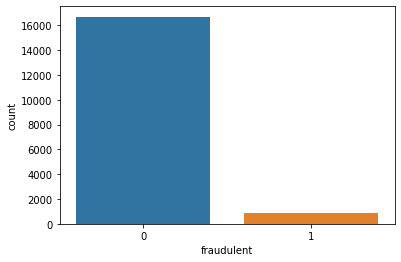

In [20]:
df.info
sns.countplot(x='fraudulent',data=df)
#The data is very skew

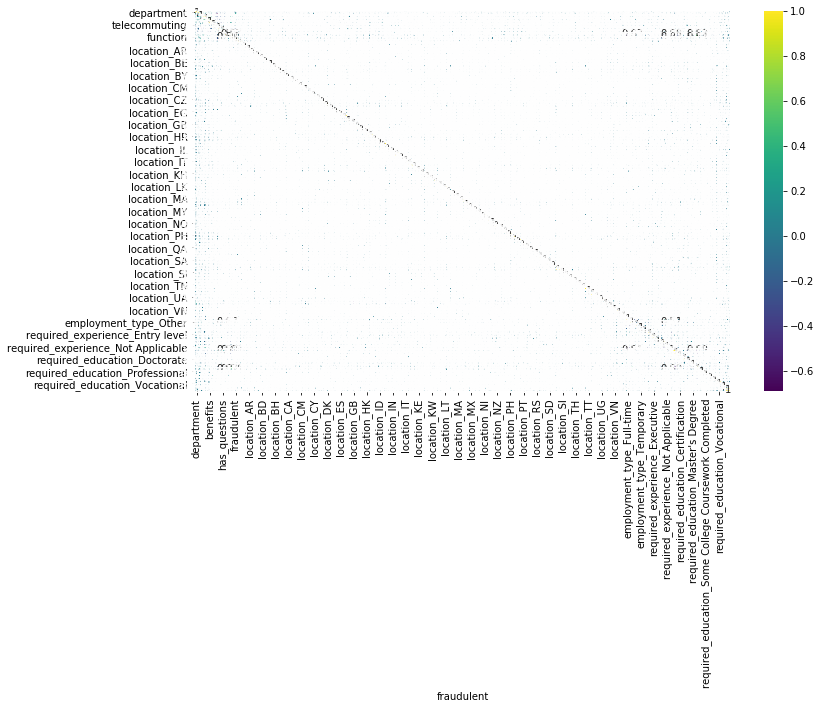

In [25]:
df.corr()
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
sns.distplot(df['fraudulent'],kde=False,bins=40)

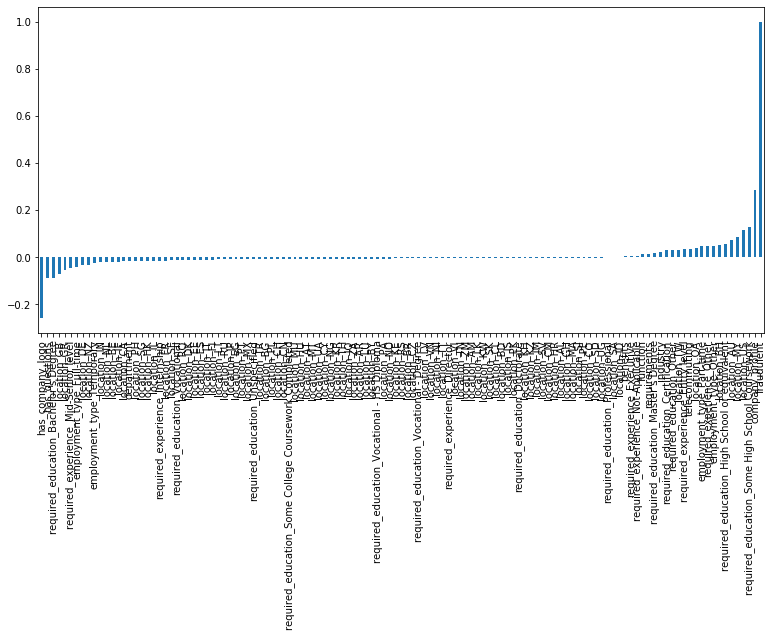

In [26]:
plt.figure(figsize=(13,6))
df.corr()['fraudulent'].sort_values().plot(kind='bar')

In [56]:
x = df.drop('fraudulent',axis=1).values
y = df['fraudulent'].values

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

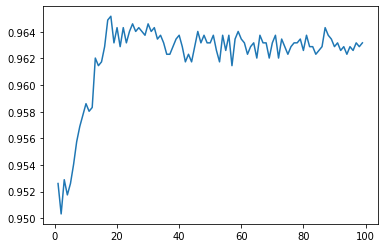

In [63]:
scores=[]
for i in range(1,100):
  tree=DecisionTreeClassifier(max_depth = i) 
  tree.fit(x_train, y_train) 
  scores.append(tree.score(x_test,y_test)) 
plt.plot(range(1,100),scores) 
plt.show()


In [69]:
tree=DecisionTreeClassifier(max_depth =18) 
tree.fit(x_train, y_train) 
tree.score(x_test,y_test)

0.9657436483014559

In [70]:
predictions = tree.predict(x_test) 
from sklearn.metrics import classification_report,confusion_matrix 
print(classification_report(y_test,predictions)) 
print(confusion_matrix(y_test,predictions))


              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3337
           1       0.66      0.57      0.61       166

    accuracy                           0.97      3503
   macro avg       0.82      0.78      0.80      3503
weighted avg       0.96      0.97      0.96      3503

[[3289   48]
 [  72   94]]


Impresive enough for the skewed dataset. Considering label 1 is only 4,8% of the total data